In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem

from utils import *

In [77]:
matchms_scores = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.0035_1%I_all_peaks_with_0s_only_matching.tsv", sep="\t")
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_scores': 'scores'}, inplace=True)
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_matches': 'matches'}, inplace=True)

matchms_scores = append_classes(matchms_scores, 'query')
df = normalize_df(append_spectrum_metadata(matchms_scores))
del df['peak_comments']

matches_col = 'matches'
scores_col = 'scores'

df['matches_norm_query'] = df[matches_col] / df['n_peaks_query']
df['matches_norm_reference'] = df[matches_col] / df['n_peaks_reference']

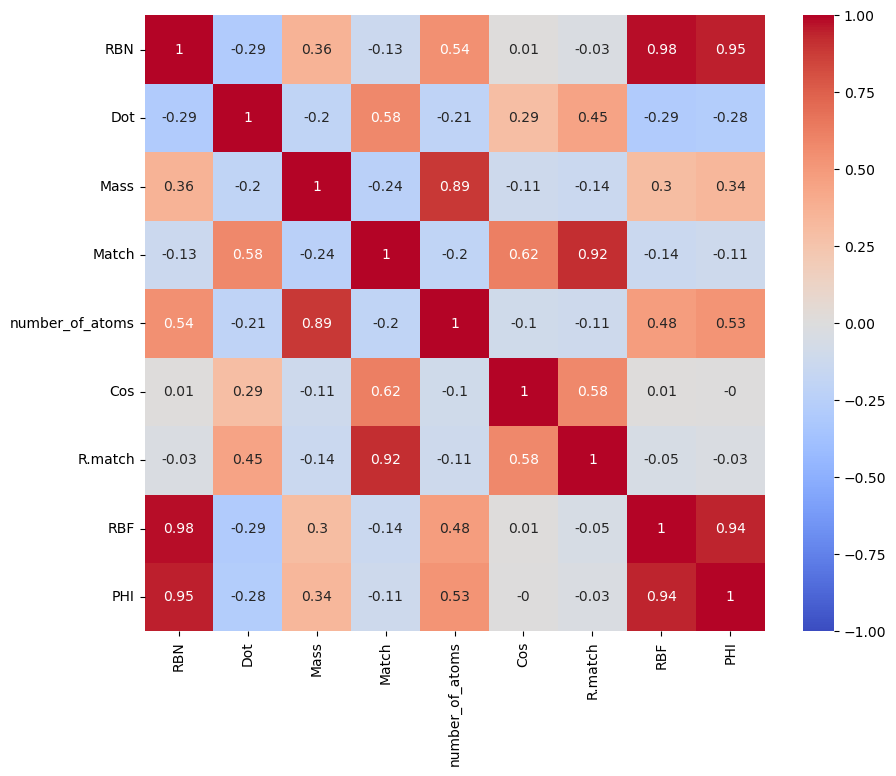

In [78]:
wang_db = pd.read_csv("../data/reference/13321_2020_470_MOESM1_ESM.csv")
wang_props = ["RBN", "Dot", "Mass", "Match", "number_of_atoms", "Cos", "R.match", "RBF", "PHI"]
# Assuming `df` is your DataFrame
corr_wang = wang_db[wang_props].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_wang, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
# plt.title('Pearson Correlations')
plt.show()

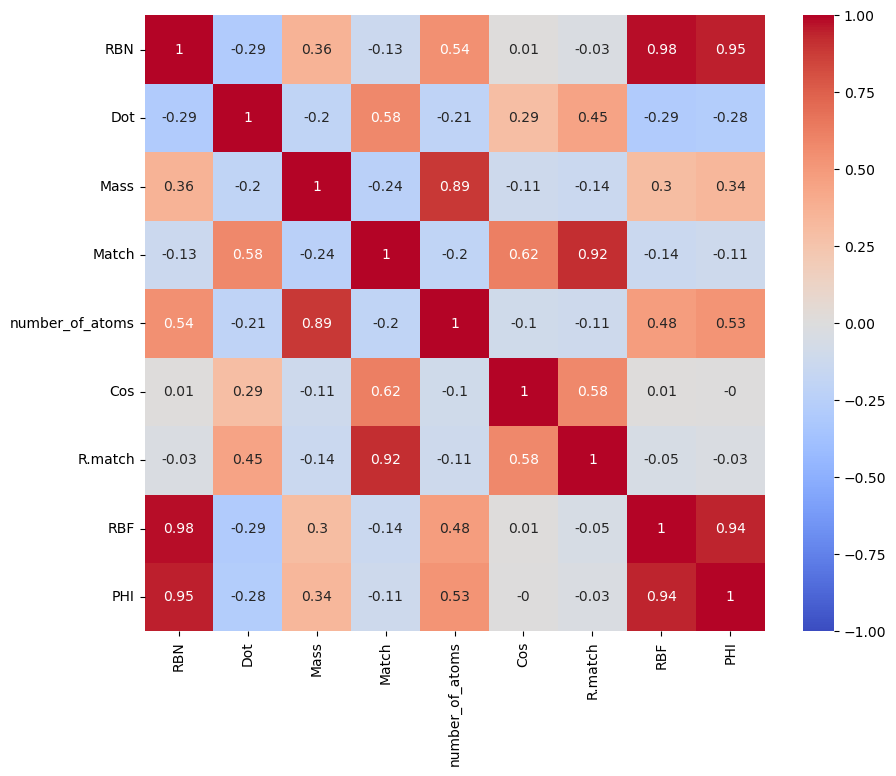

In [79]:
wang_db_tms = pd.read_csv("../data/reference/wang2022_TMS_annotated.tsv", sep="\t", decimal=",")
wang_props = ["RBN", "Dot", "Mass", "Match", "number_of_atoms", "Cos", "R.match", "RBF", "PHI"]
# Assuming `df` is your DataFrame
corr_wang = wang_db[wang_props].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_wang, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
# plt.title('Pearson Correlations')
plt.show()

In [80]:
properties = [
    'scores',
    'matches',
    'matches_norm_query',
    'matches_norm_reference',
    'molecular_flexibility',
    'rotatable_bonds',
    'stereo_centers',
    'molecular_complexity',
    'n_atoms',
    'precursor_mz',
    'electronegative_atoms',
    'aromatic_nitrogens',
    'amines',
    'amides',
]

In [81]:
wang_db["study"] = "Wang2020"
wang_db_tms["study"] = "Wang2022"
df["study"] = "This study"

In [82]:
wang_colwise_means = wang_db.mean(numeric_only=True)
wang_tms_colwise_means = wang_db_tms.mean(numeric_only=True)
our_means = df.mean(numeric_only=True)

wang_colwise_means = wang_db.median(numeric_only=True)
wang_tms_colwise_means = wang_db_tms.median(numeric_only=True)
our_means = df.median(numeric_only=True)

<Axes: xlabel='study', ylabel='Dot'>

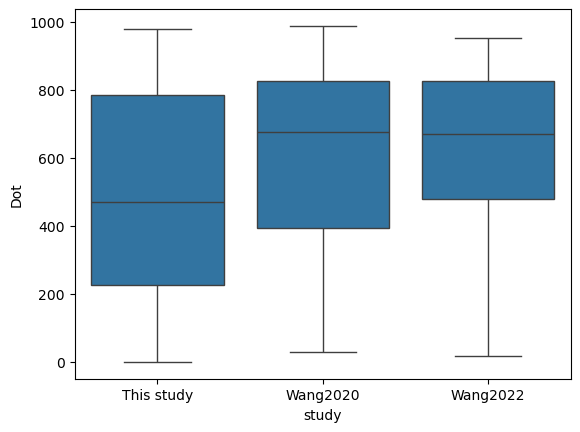

In [83]:
cols = ["study", "Dot"]
combined = pd.concat([df.rename(columns={"scores": "Dot"})[cols], wang_db[cols], wang_db_tms[cols]])

sns.boxplot(combined, x="study", y="Dot")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'amines_aliphatic'),
  Text(1, 0, 'amides_aliphatic'),
  Text(2, 0, 'acid_aliphatic'),
  Text(3, 0, 'alcohol_aliphatic'),
  Text(4, 0, 'amines_aromatic'),
  Text(5, 0, 'thiols_aliphatic'),
  Text(6, 0, 'alcohol_aromatic'),
  Text(7, 0, 'thiols_aromatic'),
  Text(8, 0, 'acid_aromatic'),
  Text(9, 0, 'amides_aromatic')])

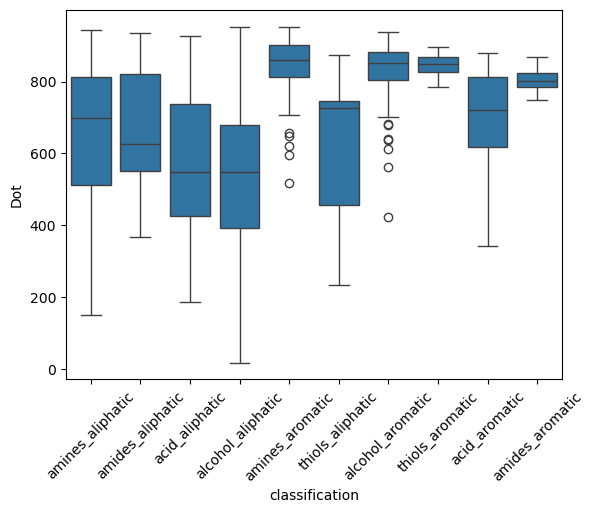

In [84]:
wang_db_tms["classification"] = wang_db_tms["superclass"] + "_" + wang_db_tms["subclass"]

sns.boxplot(wang_db_tms, x="classification", y="Dot")
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees

([0, 1], [Text(0, 0, 'aliphatic'), Text(1, 0, 'aromatic')])

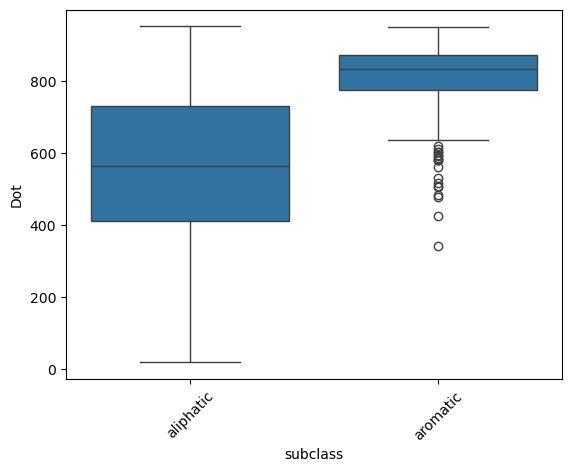

In [85]:
sns.boxplot(wang_db_tms, x="subclass", y="Dot")
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees

([0, 1, 2, 3, 4],
 [Text(0, 0, 'amines'),
  Text(1, 0, 'amides'),
  Text(2, 0, 'acid'),
  Text(3, 0, 'alcohol'),
  Text(4, 0, 'thiols')])

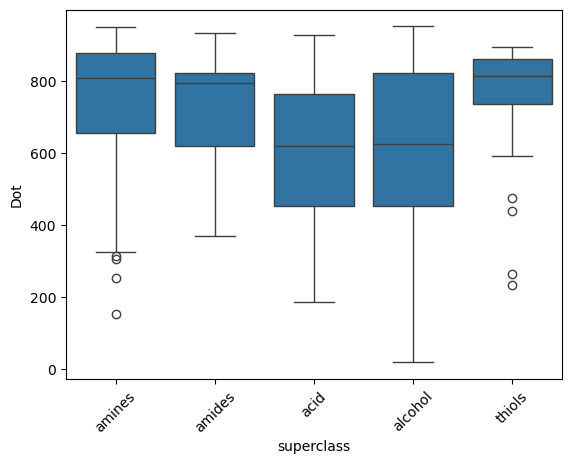

In [86]:
sns.boxplot(wang_db_tms, x="superclass", y="Dot")
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees

In [115]:
def load_sdf_into_df(filepath:str):
    db = Chem.SDMolSupplier(filepath, sanitize=True)
    return pd.DataFrame({
    "n_atoms": [int(AddHs(m).GetNumAtoms()) for m in db],
    "class": [m.GetProp("Class") for m in db],
    "superclass": [m.GetProp("Superclass") for m in db],
    "subclass": [m.GetProp("Subclass") for m in db],
    "inchikey": [str(m.GetProp("InChIKey")).split("=")[1] for m in db],
})

[17:03:17] ERROR: Problems encountered parsing data fields
[17:03:17] ERROR: moving to the beginning of the next molecule
[17:03:17] ERROR: Problems encountered parsing data fields
[17:03:17] ERROR: moving to the beginning of the next molecule
[17:03:17] ERROR: Problems encountered parsing data fields
[17:03:17] ERROR: moving to the beginning of the next molecule
[17:03:17] ERROR: Problems encountered parsing data fields
[17:03:17] ERROR: moving to the beginning of the next molecule
[17:03:17] ERROR: Problems encountered parsing data fields
[17:03:17] ERROR: moving to the beginning of the next molecule
[17:03:17] ERROR: Problems encountered parsing data fields
[17:03:17] ERROR: moving to the beginning of the next molecule
[17:03:17] ERROR: Problems encountered parsing data fields
[17:03:17] ERROR: moving to the beginning of the next molecule
[17:03:17] ERROR: Problems encountered parsing data fields
[17:03:17] ERROR: moving to the beginning of the next molecule
[17:03:17] ERROR: Proble

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Lipids and lipid-like molecules'),
  Text(1, 0, 'Organic nitrogen compounds'),
  Text(2, 0, 'Organic acids and derivatives'),
  Text(3, 0, 'Organic oxygen compounds'),
  Text(4, 0, 'Hydrocarbons'),
  Text(5, 0, 'Organoheterocyclic compounds'),
  Text(6, 0, 'Organic 1,3-dipolar compounds'),
  Text(7, 0, 'Acetylides'),
  Text(8, 0, 'Benzenoids')])

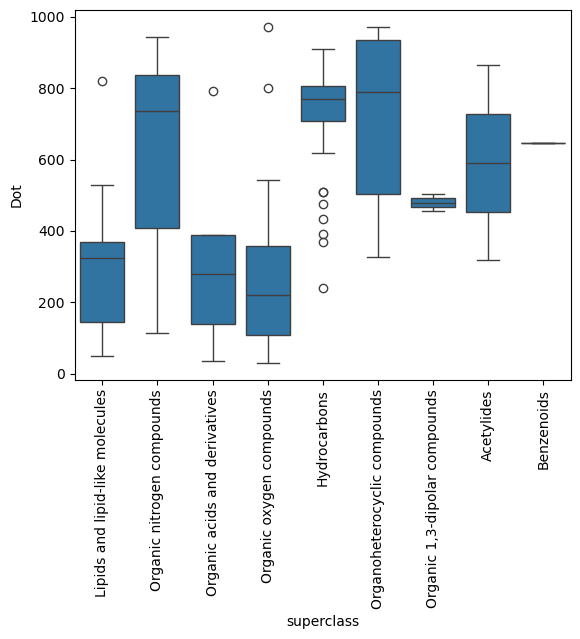

In [117]:
df_wang2020_db_with_classes = load_sdf_into_df("../data/reference/wang2020/3411.sdf")
wang_db_merged = df_wang2020_db_with_classes.set_index("inchikey").join(wang_db.set_index("Inchikey "))[["superclass","class","subclass","Dot"]].dropna()

sns.boxplot(wang_db_merged, x="superclass", y="Dot")
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 45 degrees

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Benzenoids'),
  Text(1, 0, 'Organometallic compounds'),
  Text(2, 0, 'Organoheterocyclic compounds'),
  Text(3, 0, 'Organosulfur compounds'),
  Text(4, 0, 'Organic acids and derivatives'),
  Text(5, 0, 'Lipids and lipid-like molecules'),
  Text(6, 0, 'Phenylpropanoids and polyketides'),
  Text(7, 0, 'Organic oxygen compounds'),
  Text(8, 0, 'Organic nitrogen compounds'),
  Text(9, 0, 'Alkaloids and derivatives')])

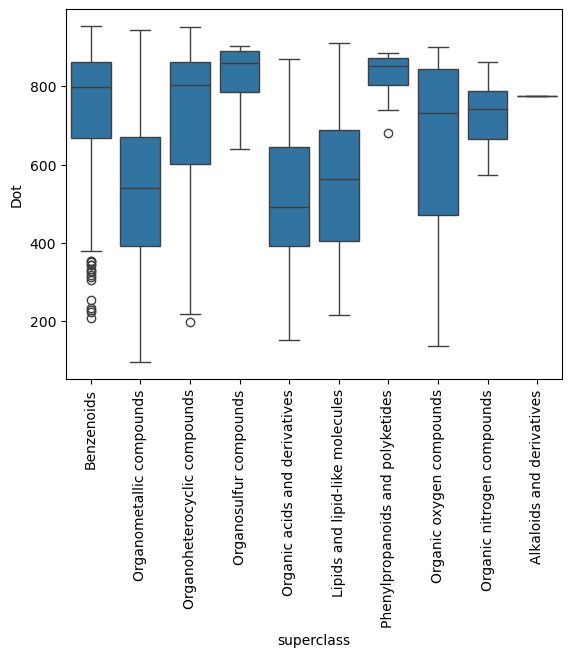

In [122]:
df_wang2022_db_tms_with_classes = load_sdf_into_df("../data/reference/wang2022/3412.sdf")
wang_db_tms_merged = df_wang2022_db_tms_with_classes.set_index("inchikey").join(wang_db_tms.set_index("inchikey")["Dot"])[["superclass","class","subclass","Dot"]].dropna()

sns.boxplot(wang_db_tms_merged, x="superclass", y="Dot")
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 45 degrees

In [89]:
rcx_db = Chem.SDMolSupplier("../data/experimental/recetox_gc-ei-ms_20201028_properties.sdf", sanitize=True)
wang2020_db = Chem.SDMolSupplier("../data/reference/structure_databases/wang2020.sdf", sanitize=True)
wang2022_es_db = Chem.SDMolSupplier("../data/reference/structure_databases/wang2022_es.sdf", sanitize=True)
wang2022_tms_db = Chem.SDMolSupplier("../data/reference/structure_databases/wang2022_TMS.sdf", sanitize=True)
schreckenbach_db = Chem.SDMolSupplier("../data/reference/structure_databases/schreckenbach_db.sdf", sanitize=True)
asgeirsson_db = Chem.SDMolSupplier("../data/reference/structure_databases/asgeirsson.sdf", sanitize=True)
lee2022_db = Chem.SDMolSupplier("../data/reference/structure_databases/lee2022.sdf", sanitize=True)

In [90]:
rcx_df = sdf_to_dataframe(rcx_db)
wang2020_df = sdf_to_dataframe(wang2020_db)
wang2022_es_df = sdf_to_dataframe(wang2022_es_db)
wang2022_tms_df = sdf_to_dataframe(wang2022_tms_db)
schreckenbach_df = sdf_to_dataframe(schreckenbach_db)
asgeirsson_df = sdf_to_dataframe(asgeirsson_db)
lee2022_df = sdf_to_dataframe(lee2022_db)

In [91]:
rcx_df_means = rcx_df.mean()
wang2020_df_means = wang2020_df.mean()
wang2022_es_df_means = wang2022_es_df.mean()
wang2022_tms_df_means = wang2022_tms_df.mean()
schreckenbach_df_means = schreckenbach_df.mean()
asgeirsson_df_means = asgeirsson_df.mean()
lee2022_df_means = lee2022_df.mean()

In [92]:
rcx_df_vals = rcx_df.agg(['mean', 'min', 'max']).stack()
wang2020_df_vals = wang2020_df.agg(['mean', 'min', 'max']).stack()
wang2022_es_df_vals = wang2022_es_df.agg(['mean', 'min', 'max']).stack()
wang2022_tms_df_vals = wang2022_tms_df.agg(['mean', 'min', 'max']).stack()
schreckenbach_df_vals = schreckenbach_df.agg(['mean', 'min', 'max']).stack()
asgeirsson_df_vals = asgeirsson_df.agg(['mean', 'min', 'max']).stack()
lee2022_df_vals = lee2022_df.agg(['mean', 'min', 'max']).stack()

In [93]:
df_vals = pd.DataFrame(
    [
        rcx_df_vals,
        wang2020_df_vals,
        wang2022_es_df_vals,
        wang2022_tms_df_vals,
        schreckenbach_df_vals,
        asgeirsson_df_vals,
        lee2022_df_vals
    ],
    index=[
        'this',
        'Wang2020',
        'Wang2022_ES',
        'Wang2022_TMS',
        'Schreckenbach2021',
        'Asgeirsson2017',
        'Lee2022'
    ]
)
df_vals = df_vals.reorder_levels([1, 0], axis=1)

In [94]:
df_vals.columns = df_vals.columns.map('_'.join)
df_vals.columns = df_vals.columns.str.replace('_', '')

In [95]:
df_vals_transposed = df_vals.transpose()
df_vals_transposed.head()

,this,Wang2020,Wang2022_ES,Wang2022_TMS,Schreckenbach2021,Asgeirsson2017,Lee2022
natomsmean,33.013624,21.953659,22.82500,33.672980,31.031250,19.761905,18.278481
aromaticnitrogensmean,0.452316,0.056098,0.00000,0.126263,0.031250,0.000000,1.392405
molecularcomplexitymean,0.729808,0.473226,0.46754,0.526534,0.594484,0.271450,0.756278
molecularflexibilitymean,0.364990,0.330405,0.30177,0.630376,0.514578,0.400975,0.043321
rotatablebondsmean,3.264305,2.653659,1.70000,4.407828,4.218750,1.428571,0.000000


In [96]:
df_vals_transposed.to_csv("study_comparisons_t.csv", float_format='%.2f')

In [97]:
df_vals.to_csv("study_comparisons.csv", float_format='%.2f')

In [98]:
df_means = pd.DataFrame(
    [
        rcx_df_means,
        wang2020_df_means,
        wang2022_es_df_means,
        wang2022_tms_df_means,
        schreckenbach_df_means,
        asgeirsson_df_means,
        lee2022_df_means
    ],
    index=[
        'RCX2024',
        'Wang2020',
        'Wang2022_ES',
        'Wang2022_TMS',
        'Schreckenbach2021',
        'Asgeirsson2017',
        'Lee2022'
    ]
)

In [99]:
df_means.to_csv("reference_datasets_means.csv", float_format='%.3f')